In [88]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [6]:
china_map = gpd.read_file('/Users/deepanchakravarthi/Downloads/CHN_adm/CHN_adm1.shp')

In [9]:
# Getting the csv in the desired format
trends=pd.read_csv('datasets/trends.csv',skiprows=2)
trends.columns=['Region','Spring roll','egg','cake']

In [16]:
map_with_gdp = china_map.set_index('NAME_1').join(trends.set_index('Region'))

In [84]:
map_with_gdp['egg']=map_with_gdp['egg'].fillna(0)

In [ ]:

# Convert the column to floats first, then to integers
map_with_gdp['egg'] = map_with_gdp['egg'].astype('float')

In [83]:
map_with_gdp['egg']

NAME_1
Anhui               NaN
Beijing            52.0
Chongqing         100.0
Fujian             53.0
Gansu               NaN
Guangdong          53.0
Guangxi            46.0
Guizhou             NaN
Hainan              NaN
Hebei             100.0
Heilongjiang        NaN
Henan              33.0
Hubei              59.0
Hunan             100.0
Jiangsu            50.0
Jiangxi             NaN
Jilin             100.0
Liaoning           59.0
Nei Mongol          NaN
Ningxia Hui         NaN
Qinghai             NaN
Shaanxi            42.0
Shandong           60.0
Shanghai           50.0
Shanxi              NaN
Sichuan            48.0
Tianjin            57.0
Xinjiang Uygur      NaN
Xizang              NaN
Yunnan              NaN
Zhejiang           60.0
Name: egg, dtype: float64

In [98]:

colors = [(0.7, 0.7, 0.7), (0.7, 0.0, 0)]  # Grey to green
n_bins = 100  # Use 100 bins from grey to green
cmap_name = 'my_custom_grey_green'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

<Axes: >

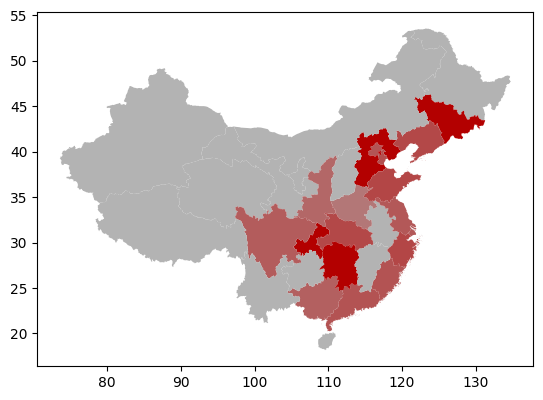

In [100]:
map_with_gdp.plot(column='egg',cmap=cm)

In [101]:
map_with_gdp.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1',
       'VARNAME_1', 'geometry', 'Spring roll', 'egg', 'cake'],
      dtype='object')

In [106]:
map_with_gdp['Spring roll'] = map_with_gdp['Spring roll'].str.replace('%', '').str.strip()

In [107]:
map_with_gdp['Spring roll'] = map_with_gdp['Spring roll'].astype('float')

In [149]:
from matplotlib.colors import ListedColormap

In [159]:
# Define custom colormaps for each column
cmaps = {
    'egg': ListedColormap(['#808080', '#FF0000']),
    'Spring roll': ListedColormap(['#0000FF', '#0000FF']),
    'cake': ListedColormap(['#808080', '#008000']),
}


In [160]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np

def adjust_colormap_for_grey_zero(original_cmap, N=256):
    """Adjust the original colormap to include grey for zero values."""
    new_colors = original_cmap(np.linspace(0, 1, N))
    # Set the first color (corresponding to zero value) to be grey
    new_colors[0] = np.array([0.7, 0.7, 0.7, 1])  # RGBA for grey
    new_cmap = ListedColormap(new_colors)
    return new_cmap

# Adjust the colormaps for each category
adjusted_cmaps = {col: adjust_colormap_for_grey_zero(plt.get_cmap(cmap)) for col, cmap in cmaps.items()}

In [157]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'map_with_gdp' is your GeoDataFrame
columns = ['egg', 'Spring roll', 'cake']  # List of columns to consider

# Create a new column for the composite measure
# Here, simply categorize based on the highest value among the specified columns
map_with_gdp['composite'] = map_with_gdp[columns].idxmax(axis=1)


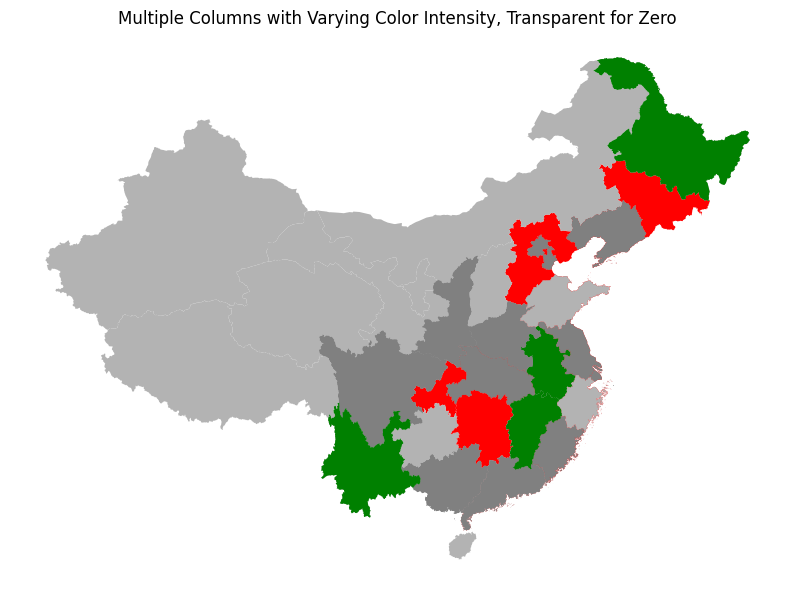

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each normalized column with its respective adjusted colormap
for norm_col, cmap in adjusted_cmaps.items():
    map_with_gdp.plot(column=norm_col, cmap=cmap, ax=ax)


ax.set_title('Multiple Columns with Varying Color Intensity, Transparent for Zero')
ax.axis('off')
plt.show()


In [163]:
map_with_gdp.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Calculate centroids and use them for label placement
centroids = map_with_gdp.centroid
for x, y, label in zip(centroids.x, centroids.y, map_with_gdp.index):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

ax.set_title('Map with Area Names')
ax.axis('off')
plt.show()

/var/folders/5b/gmtdgd750d71sjsj60ms9h2m0000gn/T/ipykernel_22662/2804010543.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = map_with_gdp.centroid


<Figure size 640x480 with 0 Axes>

In [137]:
# Create a simple mapping of columns to colors
color_mapping = {
    'egg': 'red',
    'Spring roll': 'blue',
    'cake': 'green'
}

# Apply the mapping to get actual colors for plotting
map_with_gdp['color'] = map_with_gdp['composite'].map(color_mapping)


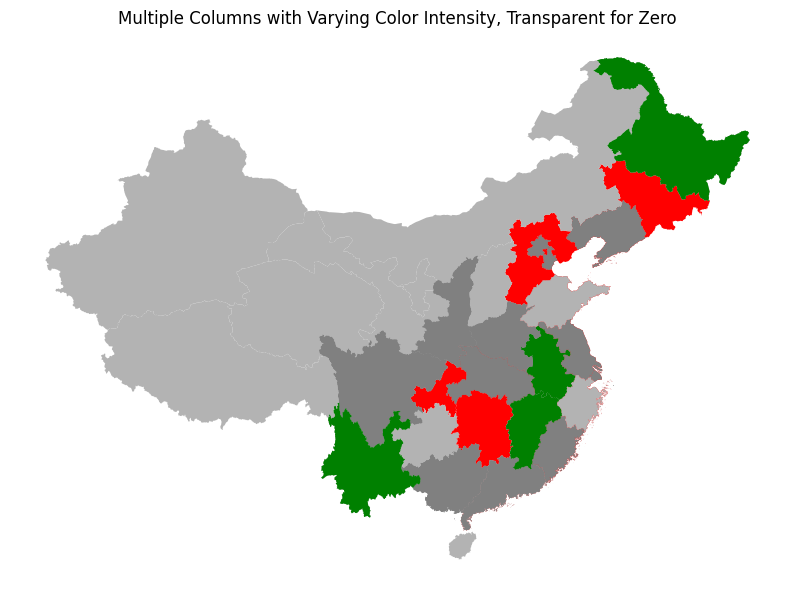

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each normalized column with its respective adjusted colormap
for norm_col, cmap in adjusted_cmaps.items():
    map_with_gdp.plot(column=norm_col, cmap=cmap, ax=ax)

# Borders for context (if available)
# china_borders.boundary.plot(ax=ax, edgecolor='black')

ax.set_title('Multiple Columns with Varying Color Intensity, Transparent for Zero')
ax.axis('off')
plt.show()


/var/folders/5b/gmtdgd750d71sjsj60ms9h2m0000gn/T/ipykernel_22662/3098718894.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = map_with_gdp.geometry.centroid


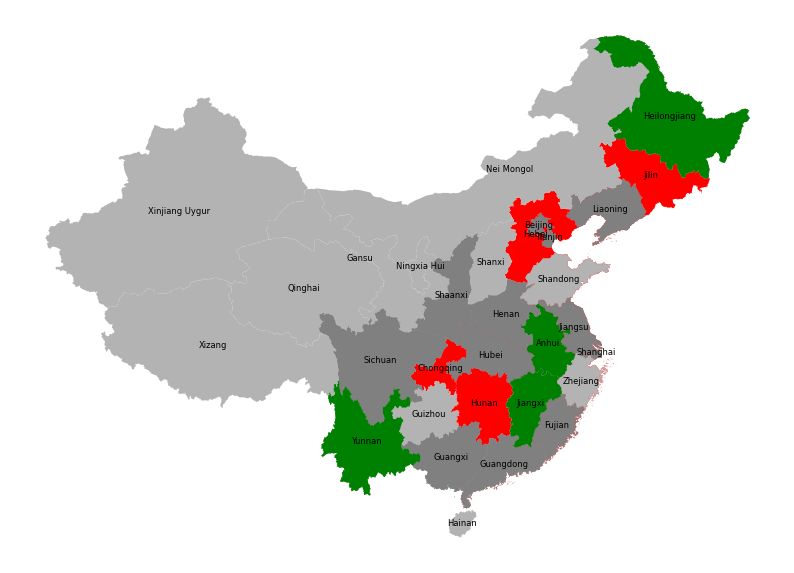

In [170]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Assuming adjusted_cmaps is a dictionary mapping your columns to their respective colormaps
for norm_col, cmap in adjusted_cmaps.items():
    map_with_gdp.plot(column=norm_col, cmap=cmap, ax=ax)

# Calculate the centroid of each geometry to use as the label position
# Directly accessing the 'geometry' attribute because 'centroid' might not be a column
centroids = map_with_gdp.geometry.centroid

# Adding state names based on the DataFrame's index
for idx, row in map_with_gdp.iterrows():
    centroid = centroids.loc[idx]  # Use 'loc' to access the centroid using the index
    # Extracting the centroid's x and y coordinates
    centroid_x, centroid_y = centroid.coords[0]
    # Place the state name (which is now the index value) at the centroid position
    ax.text(centroid_x, centroid_y, idx, fontsize=6, ha='center', va='center', color='black')  # idx is the state name

# ax.set_title('Multiple Columns with Varying Color Intensity, Transparent for Zero')
ax.axis('off')
plt.show()
